In [2]:
import pandas as pd
import numpy as np

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

import matplotlib.pyplot as plt

import ast

C:\Users\suyog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
ner_data = pd.read_csv('ner_extracted_2.csv', index_col=0)
ner_data = ner_data.drop_duplicates(subset='filename')
ner_data.reset_index(drop=True, inplace=True)
ner_data

,filename,error,court,petitioners,respondents,judges,date,org,gpe,provisions,statutes,precedents
0,Abhijeet_Suryakant_Maske_And_Anr_vs_The_State_...,NaN,"['High Court Of Judicature At Bombay', 'Suprem...","['Abhijeet Suryakant Maske', 'Abhijeet Suryaka...","['State Of Maharashtra', 'State of Maharashtra...","['C.V. Bhadang', 'C.V. Bhadang', 'C.V. Bhadang...","['1 March, 2022', '6 November 2020', '21 Septe...","['Baramati Police Station, Dist', 'Baramati Po...","['Pune', 'Mumbai', 'Mumbai', 'Pune']","['Section 328 of Indian Penal Code', 'Section ...","['Indian Penal Code', 'Food Safety and Standar...",['Abhijeet Suryakant Maske And Anr vs The Stat...
1,Amluya_Anand_vs_State_on_8_March_2022.PDF,'provision_statute_pairs',['High Court Of Judicature For Rajasthan At\n ...,"['Amluya Anand', 'Amluya Anand']","['State', 'State']","['Sandeep Mehta', 'Sandeep Mehta', 'Merta', 'C...","['08/03/2022', '17/02/2022', '07.04.2015', '24...","['Swastik Milk Chilling Centre', 'Amul Dairy',...","['Nagaur', 'Thanwla District Nagaur', 'Jodhpur...","['Section 468', 'Section 77', 'Sections 26(2)(...","['Cr', 'Food Safety and Standards Act, 2006', ...","['CRLMP-545/2020]Amluya Anand vs State', 'V.V...."
2,Arulmurugan_Starch_Industries_vs_Food_Safety_A...,NaN,['High Court Of Judicature At Madras'],"['Arulmurugan Starch Industries', '2018Arulmur...","['Food Safety And Standards', 'Commissioner of...","['Krishnan Ramasamy', 'Krishnan Ramasamy', 'KR...","['11.7.2018', '19.01.2022', '19 January, 2022'...",['Food Safety and Standards Authority of India'],"['New Delhi', 'Chennai', 'Salem District', 'Sa...",[],[],[]
3,Arun_Raosaheb_Khot_vs_State_Of_Maharashtra_on_...,NaN,"['High Court Of Judicature At Bombay', 'Suprem...","['Arun Raosaheb Khot', 'Sneha\nNitin', 'Arun R...","['State Of Maharashtra', 'State of Maharashtra']","['C.V. Bhadang', 'C.V. Bhadang', 'C.V. Bhadang...","['31 January, 2022', '6 November 2020', '21 Se...","['Police Station Hadapsar, District Pune']","['Mumbai', 'Mumbai']",['Section 328 of Indian Penal Code'],['Indian Penal Code'],[]
4,Asha_Singh_vs_The_State_Of_Bihar_on_24_March_2...,NaN,"['High Court Of Judicature At Patna', 'Patna H...","['Asha Singh', 'Asha Singh']","['State Of Bihar', 'State of Bihar', 'Union Of...","['Ashutosh Kumar', 'Ashutosh Kumar']","['24-03-2022', 'dt.24-03-2022', '24 March, 202...","['C.B.I.', 'Tata Institute of Social Sciences'...","['Turkauliya', 'Raghunathpur', 'Motihari', 'Bi...","['Section 341 of Criminal Procedure Code', 'Se...","['Criminal Procedure Code', 'Protection of Chi...",[]
...,...,...,...,...,...,...,...,...,...,...,...,...
189,Vijaysing_Dnyaneshwar_Gotya_S_O_vs_State_Of_Mh...,'provision_statute_pairs',"['High Court Of Judicature At Bombay', 'Additi...","['Vijaysing @ Dnyaneshwar @ Gotya', 'Vijaysing...","['State Of Mha', 'State of\n ...","['Avinash G. Gharote', 'AVINASH G. GHAROTE', '...","['25.11.2021', '24.11.21', '25.11.2021', '13 J...","['German Cancer Research Centre (DKFZ)', 'Depa...","['Malkapur-Kurha', 'Harsoda', 'State of Mahara...","['Sections 188, 272, 273, 328', 'Sections 26(2...","['IPC', 'Food Safety and Standard Act 2006', '...",['Vijaysing @ Dnyaneshwar @ Gotya S/O ... vs S...
190,Viky_Vikash_Ku_Agrawal_vs_State_Of_Odisha_Opp_...,NaN,['High Court Of Orissa At Cuttack'],"['Viky @ Vikash Ku Agrawal', 'Viky @ Vikash Ku...","['State Of Odisha', 'State of Odisha']","['S.K. Sahoo', 'S.K. Sahoo', 'S.K. Sahoo', 'J....","['11.01.2021', '9 February, 2022', '13.04.2021...",[],[],['section 272/273/420/269/270 of Indian Penal ...,"['Indian Penal Code', 'Cr.', 'Food Safety and ...",[]
191,Vishnu_Gupta_Lalla_vs_The_State_Of_Madhya_Prad...,NaN,"['High Court Of Madhya Pradesh', 'Supreme Court']","['Vishnu Gupta @ Lalla', 'Vishnu Gupta @ Lalla']","['State Of Madhya Pradesh', 'State Of Madhya P...","['Anjuli Palo', 'ANJULI PALO']","['10.8.2021', '22.1.2021', '3 January, 2022', ...","['P.S.\nRanjhi', 'Khadya Suraksha Aur Manak Ad...",['Jabalpur'],"['Section 420 of Indian Penal Code', 'Section ...","

In [4]:
gpt_data = pd.read_csv('openai_extracted.csv', index_col=0)
gpt_data = gpt_data[gpt_data['file_name'].isin(ner_data['filename'])]
gpt_data

,file_name,summary,court,petitioners,respondents,judges,date,org,gpe,provisions,statutes,precedents,key_facts,type_of_case,decision
0,Abhijeet_Suryakant_Maske_And_Anr_vs_The_State_...,In the case of Abhijeet Suryakant Maske and An...,HIGH COURT OF JUDICATURE AT BOMBAY,"['Abhijeet Suryakant Maske', 'Dilip Ramchandra...",['The State of Maharashtra'],['C.V. Bhadang'],01-03-2022,[],"['Pune', 'Maharashtra']","['Section 328 of IPC', 'Section 272 of IPC', '...","['Food Safety and Standards Act, 2006']","['Joseph Kurian & Anr. Vs. State of Kerala', '...",The Applicants are seeking anticipatory bail i...,Anticipatory Bail Application,in favour of appellant
1,Amluya_Anand_vs_State_on_8_March_2022.PDF,**Case Summary: Amluya Anand vs State (8 March...,HIGH COURT OF JUDICATURE FOR RAJASTHAN AT JODHPUR,['Amluya Anand'],"['State, Through Vinod Sharma, Food Safety Off...",['Sandeep Mehta'],08-03-2022,"['Amul Dairy', 'Food Safety Officer', 'Chief M...","['Mujjafarpur', 'Gurgaon', 'Nagaur', 'Devgarh ...","['Section 468 of Cr.P.C.', 'Section 77 of the ...","['Food Safety and Standards Act, 2006']",['Sri.V.V.S.S.R. Prakash Rao vs. The State of ...,The petitioner sought to quash orders taking c...,Criminal Miscellaneous Petition,in favour of appellant
2,Arulmurugan_Starch_Industries_vs_Food_Safety_A...,**Case Summary: Arulmurugan Starch Industries ...,High Court of Judicature at Madras,['Arulmurugan Starch Industries'],['Food Safety and Standards Authority of India...,['Krishnan Ramasamy'],19-01-2022,['Food Safety and Standards Authority of India...,"['Salem District', 'New Delhi', 'Chennai']",['Article 226 of the Constitution of India'],"['Food Safety and Standards Act, 2006']",[],The petitioner filed a writ petition challengi...,Writ Petition,The court directed the Commissioner of Food Sa...
3,Arun_Raosaheb_Khot_vs_State_Of_Maharashtra_on_...,In the case of Arun Raosaheb Khot vs. State of...,High Court of Judicature at Bombay,['Arun Raosaheb Khot'],['The State of Maharashtra'],['C.V. Bhadang'],31-01-2022,[],"['Pune', 'Maharashtra']","['Section 272 of IPC', 'Section 273 of IPC', '...","['Food Safety and Standards Act, 2006']",['Joseph Kurian & Anr. Vs. State of Kerala'],The applicant is seeking anticipatory bail in ...,Anticipatory Bail Application,in favour of appellant
4,Asha_Singh_vs_The_State_Of_Bihar_on_24_March_2...,In the case of Asha Singh vs The State of Biha...,HIGH COURT OF JUDICATURE AT PATNA,['Asha Singh'],"['The State of Bihar', 'THE UNION OF INDIA THR...",['Ashutosh Kumar'],24-03-2022,"['Tata Institute of Social Sciences', 'SAKHI']","['Bihar', 'Patna', 'East Champaran', 'Motihari']","['Section 341 of IPC', 'Section 342 of IPC', '...","['Indian Penal Code', 'Protection of Children ...",[],"The petitioner, Asha Singh, is seeking anticip...",Criminal Miscellaneous,against appellant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,Vijaysing_Dnyaneshwar_Gotya_S_O_vs_State_Of_Mh...,**Case Summary: Vijaysing @ Dnyaneshwar @ Goty...,"High Court of Judicature at Bombay, Nagpur Bench",['Vijaysing @ Dnyaneshwar @ Gotya Raghunandan ...,['State of Maharashtra'],['Avinash G. Gharote'],13-01-2022,[],"['Maharashtra', 'Mumbai']","['Section 188 of IPC', 'Section 272 of IPC', '...","['Food Safety and Standard Act 2006', 'Cigaret...",['Ganesh Pandurang Jadhao vrs. State of Mahara...,The applicant was arrested for transporting co...,Criminal Application (Bail),against appellant
192,Viky_Vikash_Ku_Agrawal_vs_State_Of_Odisha_Opp_...,In the case of Viky @ Vikash Ku Agrawal vs Sta...,High Court of Orissa at Cuttack,['Viky @ Vikash Ku Agrawal'],['State of Odisha'],['S.K. Sahoo'],09-02-2022,[],"['Odisha', 'Kantabanji']","['Section 438 of Cr.P.C.', 'Section 272 of IPC...","['Indian Penal Code', 'Food Safety and Standar...",[],The petitioner applied for anticipatory bail i...,Anticipatory bail application,in favour of appellant
193,Vishnu_Gupta_Lalla_vs_The_State_Of_Madhya_Prad...,"On January 3, 2022, the High Court of Madhya P...",High Cour

In [5]:
def clean_columns(df, rows):
    for row in rows:
        df[row] = df[row].apply(lambda x: ast.literal_eval(x))
        df[row] = df[row].apply(lambda x: [i.lower() for i in x])
    return df

In [6]:
def deduplicate(df, rows):
    for row in rows:
        df[row] = df[row].apply(lambda x: list(set(x)))
    return df

In [7]:
list_rows = ['petitioners', 'respondents', 'judges', 'org', 'gpe', 'provisions', 'statutes', 'precedents']

ner_data = clean_columns(ner_data, list_rows)
gpt_data = clean_columns(gpt_data, list_rows)

ner_df_deduplicated = deduplicate(ner_data, list_rows)
gpt_df_deduplicated = deduplicate(gpt_data, list_rows)

In [8]:
# fuzzy deduplication: remove similar items from each row in each column

def fuzzy_deduplicate(df, rows):

    return df

In [87]:
ner_fuzz = fuzzy_deduplicate(ner_df_deduplicated, list_rows)
gpt_fuzz = fuzzy_deduplicate(gpt_df_deduplicated, list_rows)

In [9]:
ner_df_deduplicated

,filename,error,court,petitioners,respondents,judges,date,org,gpe,provisions,statutes,precedents
0,Abhijeet_Suryakant_Maske_And_Anr_vs_The_State_...,NaN,"['High Court Of Judicature At Bombay', 'Suprem...",[abhijeet suryakant maske],"[state of kerala, state of maharashtra, dilip ...","[c.v. bhadang, sneha chavan]","['1 March, 2022', '6 November 2020', '21 Septe...","[baramati police station, dist]","[mumbai, pune]","[section 59 of food safety and standards act, ...","[indian penal code, food safety and standards ...",[abhijeet suryakant maske and anr vs the state...
1,Amluya_Anand_vs_State_on_8_March_2022.PDF,'provision_statute_pairs',['High Court Of Judicature For Rajasthan At\n ...,[amluya anand],[state],"[sandeep mehta),j, sandeep mehta, cjm nagaur, ...","['08/03/2022', '17/02/2022', '07.04.2015', '24...","[swastik milk chilling centre, amul dairy, cen...","[thanwla district nagaur, ajmer, jodhpur, nagaur]","[sections 26(2)(i) and 59, section 482, sectio...","[f.s.s. act, food safety and standards act, 20...",[pankaj mahajan vs state of himachal pradesh: ...
2,Arulmurugan_Starch_Industries_vs_Food_Safety_A...,NaN,['High Court Of Judicature At Madras'],"[arulmurugan starch industries, 2018arulmuruga...","[designated officer,\n ...",[krishnan ramasamy],"['11.7.2018', '19.01.2022', '19 January, 2022'...",[food safety and standards authority of india],"[salem-1, new delhi, chennai, salem district]",[],[],[]
3,Arun_Raosaheb_Khot_vs_State_Of_Maharashtra_on_...,NaN,"['High Court Of Judicature At Bombay', 'Suprem...","[sneha\nnitin, arun raosaheb khot, sneha chavan]",[state of maharashtra],[c.v. bhadang],"['31 January, 2022', '6 November 2020', '21 Se...","[police station hadapsar, district pune]",[mumbai],[section 328 of indian penal code],[indian penal code],[]
4,Asha_Singh_vs_The_State_Of_Bihar_on_24_March_2...,NaN,"['High Court Of Judicature At Patna', 'Patna H...",[asha singh],"[state of bihar, union of india]",[ashutosh kumar],"['24-03-2022', 'dt.24-03-2022', '24 March, 202...","[kesariya p.s. case, tata institute of social ...","[turkauliya, raghunathpur, bihar, motihari]","[section 342 of criminal procedure code, secti...",[protection of children from sexual offences (...,[]
...,...,...,...,...,...,...,...,...,...,...,...,...
189,Vijaysing_Dnyaneshwar_Gotya_S_O_vs_State_Of_Mh...,'provision_statute_pairs',"['High Court Of Judicature At Bombay', 'Additi...",[vijaysingh @ dnyaneshwar @ gotya raghunandan ...,[state of\n mahara...,"[lin, iushncc, garewal, rosin, kuo, reith, lee...","['25.11.2021', '24.11.21', '25.11.2021', '13 J...","[department of head and neck surgery, departme...","[malkapur-kurha, mumbai, harsoda, indian, heid...","[sections 26(2)(i), 26(2), section 328, sec 26...","[food safety & standard act, 2006, oral squamo...","[unicorn industries; (2019) 10 scc 575, union ..."
190,Viky_Vikash_Ku_Agrawal_vs_State_Of_Odisha_Opp_...,NaN,['High Court Of Orissa At Cuttack'],[viky @ vikash ku agrawal],[state of odisha],"[j.m.f.c., kantabanji, s.k. sahoo]","['11.01.2021', '9 February, 2022', '13.04.2021...",[],[],[section 51/53/54/59/61/63 of of food safety a...,"[food safety and standards act, 2006, epidemic...",[]
191,Vishnu_Gupta_Lalla_vs_The_State_Of_Madhya_Prad...,NaN,"['High Court Of Madhya Pradesh', 'Supreme Court']",[vishnu gupta @ lalla],"[state of madhya pradesh)\njabalpur, state of ...",[anjuli palo],"['10.8.2021', '22.1.2021', '3 January, 2022', ...","[state of bihar, p.s.\nranjhi, khadya suraksha...",[jabalpur],"[section 52 of food safety and standards act, ...","[indian penal code, food safety and standards ...",[vishnu gupta @ lalla vs the state of madhya p...
192,V_Balakrishnan_vs_The_State_Represented_By_on_...,NaN,"['High Court Of Judicature At Madras', 'Judici...",[v.balakrishnan],"[2.tamil nadu food safety, state, public prose...",[m.nirmal kumar],"['08.05.2017', '08.05.2017', '17.08.2017', '17...",[tamil nadu food safety and drugs administrati...,"[coimbatore, telungupalayam, coimbatore district]",[sectio

In [10]:
def calculate_metrics(llm_df, ner_df, column, threshold=80):
    true_positives = 0
    false_positives = 0
    false_negatives = 0

    for i in range(len(llm_df)):
        llm_statutes = llm_df.iloc[i][column] if isinstance(llm_df.iloc[i][column], list) else []
        ner_statutes = ner_df.iloc[i][column] if isinstance(ner_df.iloc[i][column], list) else []
        
        case_true_positives = 0
        case_false_positives = 0
        case_false_negatives = 0

        if llm_statutes:
            for llm_statute in llm_statutes:
                llm_statute = llm_statute.strip() 

                if not llm_statute:
                    continue
                
                if llm_statute in ner_statutes:
                    case_true_positives += 1
                else:
                    case_false_positives += 1
                
                #calculate false negatives
                case_false_negatives = len(ner_statutes) - case_true_positives
            

        true_positives += case_true_positives
        false_positives += case_false_positives
        false_negatives += case_false_negatives

    # Precision: True Positives / (True Positives + False Positives)
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0

    # Recall: True Positives / (True Positives + False Negatives)
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0

    # F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return {
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score,
        'tp': true_positives,
        'fp': false_positives,
        'fn': false_negatives
    }

out2 = calculate_metrics(gpt_df_deduplicated, ner_df_deduplicated, 'statutes',threshold=45)

In [11]:
out2

{'precision': 0.509478672985782,
 'recall': 0.2505827505827506,
 'f1_score': 0.3359375,
 'tp': 215,
 'fp': 207,
 'fn': 643}

In [77]:
out_fuzz = calculate_metrics(gpt_fuzz, ner_fuzz, 'statutes',threshold=45)

In [30]:
# plot confusion matrix

import itertools
def plot_confusion_matrix(cm, col, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # if normalize:
    #     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    #     print("Normalized confusion matrix")
    # else:
    #     print('Confusion matrix, without normalization')

    # print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('NER label')
    plt.xlabel('GPT label')
    #save plot to file
    plt.savefig('confusion_matrix_'+ col + '.png')
    #reset plot
    plt.clf()
    

In [31]:
for col in list_rows:
    out = calculate_metrics(gpt_df_deduplicated, ner_df_deduplicated, col, threshold=45)
    cm = np.array([[out['tp'], out['fn']], [out['fp'], 0]])
    plot_confusion_matrix(cm, col, ['Present', 'Not Present'], title='Confusion matrix for ' + col)

<Figure size 640x480 with 0 Axes>

Confusion matrix, without normalization
[[215 207]
 [643   0]]


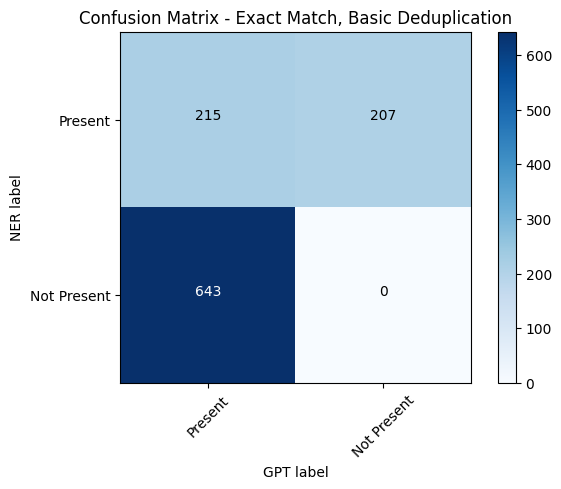

In [13]:
plot_confusion_matrix(np.array([[out2['tp'], out2['fp']], [out2['fn'], 0]]), ['Present', 'Not Present'], normalize=False, title='Confusion Matrix - Exact Match, Basic Deduplication')

In [19]:
for column in list_rows:
    for i in gpt_df_deduplicated[column]:
        # rearrange in alphabetical order
        i.sort()
    for i in ner_df_deduplicated[column]:
        i.sort()

gpt_df_deduplicated["gpe"]

0                                    [maharashtra, pune]
1      [devgarh road, thanwla district nagaur, gurgao...
2                   [chennai, new delhi, salem district]
3                                    [maharashtra, pune]
4               [bihar, east champaran, motihari, patna]
                             ...                        
191                                [maharashtra, mumbai]
192                                 [kantabanji, odisha]
193                           [jabalpur, madhya pradesh]
194                                         [coimbatore]
195                       [assam, dima hasao, new delhi]
Name: gpe, Length: 194, dtype: object

In [ ]:
for column in list_rows:
    gpt_col = "gpt extracted " + column
    ner_col = "ner extracted " + column
    out_df = pd.DataFrame(columns=["file_name", gpt_col, ner_col])
    out_df["file_name"] = gpt_df_deduplicated["file_name"]
    out_df[gpt_col] = gpt_df_deduplicated[column]
    out_df[ner_col] = ner_df_deduplicated[column]
    out_df["true_positives"] = 0
    out_df["false_positives"] = 0
    out_df["false_negatives"] = 0
    for i in range(len(out_df)):
        llm_statutes = out_df.iloc[i][gpt_col] if isinstance(out_df.iloc[i][gpt_col], list) else []
        ner_statutes = out_df.iloc[i][ner_col] if isinstance(out_df.iloc[i][ner_col], list) else []
        
        case_true_positives = 0
        case_false_positives = 0
        case_false_negatives = 0

        if llm_statutes:
            for llm_statute in llm_statutes:
                llm_statute = llm_statute.strip() 

                if not llm_statute:
                    continue
                
                if llm_statute in ner_statutes:
                    case_true_positives += 1
                else:
                    case_false_positives += 1
                
                #calculate false negatives
                case_false_negatives = len(ner_statutes) - case_true_positives
        tp = 0
        fp = 0
        fn = 0
        for item in llm_statutes:
            if item in ner_statutes:
                tp += 1
            else:
                fp += 1
        fn = len(ner_statutes) - tp
        out_df.loc[i, "true_positives"] = tp
        out_df.loc[i, "false_positives"] = fp
        out_df.loc[i, "false_negatives"] = fn
        out_df.loc[i, "precision"] = tp / (tp + fp) if (tp + fp) > 0 else 0
    out_df.to_csv("comparison_" + column + ".csv")

In [21]:
comp_gpe = pd.read_csv('comparison_gpe.csv', index_col=0)
comp_gpe

,file_name,gpt extracted gpe,ner extracted gpe
0,Abhijeet_Suryakant_Maske_And_Anr_vs_The_State_...,"['maharashtra', 'pune']","['mumbai', 'pune']"
1,Amluya_Anand_vs_State_on_8_March_2022.PDF,"['devgarh road, thanwla district nagaur', 'gur...","['ajmer', 'jodhpur', 'nagaur', 'thanwla distri..."
2,Arulmurugan_Starch_Industries_vs_Food_Safety_A...,"['chennai', 'new delhi', 'salem district']","['chennai', 'new delhi', 'salem district', 'sa..."
3,Arun_Raosaheb_Khot_vs_State_Of_Maharashtra_on_...,"['maharashtra', 'pune']",['mumbai']
4,Asha_Singh_vs_The_State_Of_Bihar_on_24_March_2...,"['bihar', 'east champaran', 'motihari', 'patna']","['bihar', 'motihari', 'raghunathpur', 'turkaul..."
...,...,...,...
191,Vijaysing_Dnyaneshwar_Gotya_S_O_vs_State_Of_Mh...,"['maharashtra', 'mumbai']",['jabalpur']
192,Viky_Vikash_Ku_Agrawal_vs_State_Of_Odisha_Opp_...,"['kantabanji', 'odisha']","['coimbatore', 'coimbatore district', 'telungu..."
193,Vishnu_Gupta_Lalla_vs_The_State_Of_Madhya_Prad...,"['jabalpur', 'madhya pradesh']","['america', 'assam', 'assam, ulubari', 'bhagal..."
194,V_Balakrishnan_vs_The_State_Represented_By_on_...,['coimbatore'],NaN


In [ ]:
#for each item in the gpt row, check if it is in the ner row
for row in list_rows:
    file_name = "comparison_"+row+".csv"
    out_df = pd.read_csv(file_name)
    col_name = "gpt extracted "+row
    col_name2 = "ner extracted "+row
    out_df[col_name] = out_df[col_name].apply(lambda x: ast.literal_eval(x))
    out_df[col_name2] = out_df[col_name2].apply(lambda x: ast.literal_eval(x))
    out_df["true_positives"] = 0
    out_df["false_positives"] = 0
    out_df["false_negatives"] = 0
    for i in range(len(out_df)):
        gpt = out_df[col_name][i]
        ner = out_df[col_name2][i]
        tp = 0
        fp = 0
        fn = 0
        for item in gpt:
            if item in ner:
                tp += 1
            else:
                fp += 1
        fn = len(ner) - tp
        out_df.loc[i, "true_positives"] = tp
        out_df.loc[i, "false_positives"] = fp
        out_df.loc[i, "false_negatives"] = fn
    out_df.to_csv(file_name)

ValueError: malformed node or string: nan